<a href="https://www.kaggle.com/code/mostafamamdouhhassan/titanic-survivals-predection?scriptVersionId=216213498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

# Reading data 


In [2]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
gender_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)
print(gender_sub.shape)

(891, 12)
(418, 11)
(418, 2)


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = df_train[['Pclass' , 'Sex' , 'Age' , 'Fare']]
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [8]:
y = df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
X.isna().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [10]:
y.isna().sum()

0

# Filling Missing Data

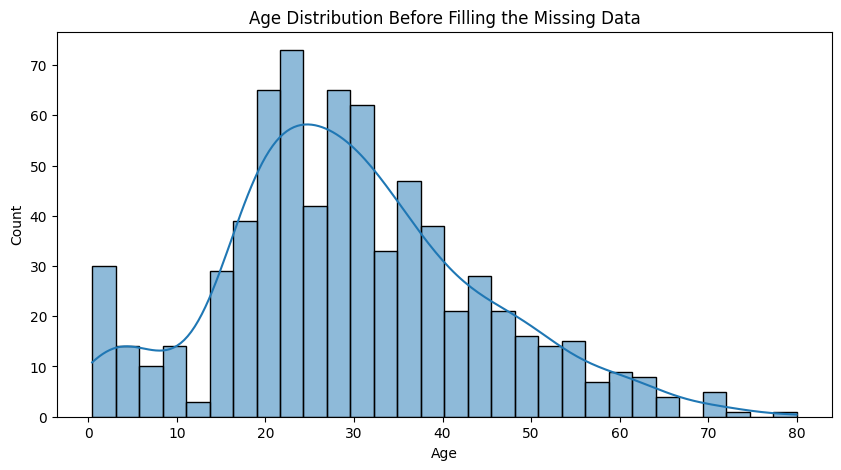

In [11]:
plt.figure(figsize=(10, 5))

sns.histplot(X['Age'], bins=30, kde=True)

plt.title('Age Distribution Before Filling the Missing Data')

plt.show()

In [12]:
X['Age'].fillna(X['Age'].median(), inplace=True)

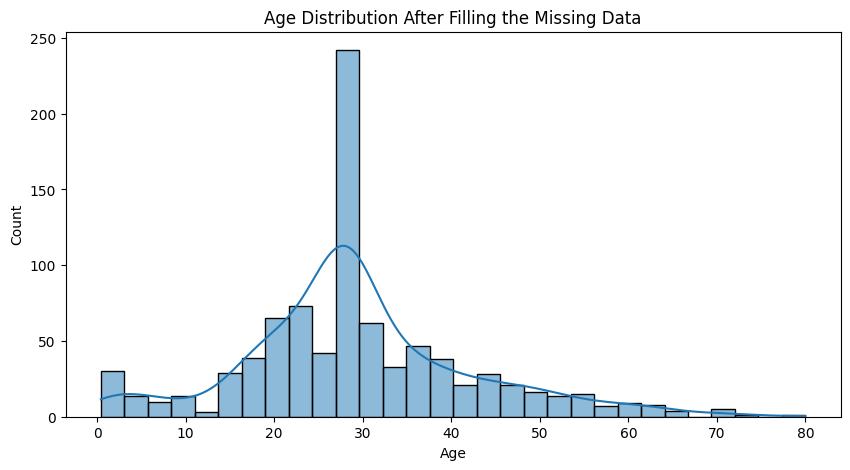

In [13]:
plt.figure(figsize=(10, 5))

sns.histplot(X['Age'], bins=30, kde=True)

plt.title('Age Distribution After Filling the Missing Data')

plt.show()

In [14]:
X.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

# Encoding

In [15]:
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])

# Training and Testing Models

In [16]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Pclass,Sex,Age,Fare
0,1.0,1.0,0.271174,0.014151
1,0.0,0.0,0.472229,0.139136
2,1.0,0.0,0.321438,0.015469
3,0.0,0.0,0.434531,0.103644
4,1.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.5,1.0,0.334004,0.025374
887,0.0,0.0,0.233476,0.058556
888,1.0,0.0,0.346569,0.045771
889,0.0,1.0,0.321438,0.058556


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Random Forest with 10 Trees": RandomForestClassifier(n_estimators=10),
    "AdaBoost 20 ": AdaBoostClassifier(n_estimators=20, random_state=42),
    "AdaBoost 50": AdaBoostClassifier(n_estimators=50, random_state=42),
    "AdaBoost 100": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting 50": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting 100": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost 20": XGBClassifier(n_estimators=20, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "XGBoost 50": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "XGBoost 100": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
}


In [20]:
for name, model in classification_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Accuracy for Logistic Regression: 0.79
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

--------------------------------------------------
Training Decision Tree...
Accuracy for Decision Tree: 0.75
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       105
           1       0.69      0.73      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179

--------------------------------------------------
Training Random Forest...
Accuracy for Random Forest: 0.78
              precision    recall  f1-score   support

